In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/dataset_cleaned.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [3]:
tcp = df[df['protocol_type']=='tcp']
tcp = tcp.drop(['protocol_type','flag'],axis=1)
tcp.head()

,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
9,0,http,223,185,0,0,0,0,0,1,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.
11,0,http,230,260,0,0,0,0,0,1,...,255,1.00,0.00,0.33,0.07,0.33,0.0,0.00,0.00,normal.
14,1,smtp,3170,329,0,0,0,0,0,1,...,39,0.72,0.11,0.02,0.00,0.02,0.0,0.09,0.13,normal.
15,0,http,297,13787,0,0,0,0,0,1,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.
16,0,http,291,3542,0,0,0,0,0,1,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.


In [4]:
tcp.shape

(119357, 40)

In [5]:
features = ["service","src_bytes","wrong_fragment","count","num_compromised","srv_count","srv_serror_rate","serror_rate"]
target = "result"

In [6]:
services = tcp['service'].unique()
services

array(['http', 'smtp', 'ftp_data', 'ftp', 'other', 'auth', 'IRC', 'X11',
       'finger', 'time', 'domain', 'telnet', 'pop_3', 'private', 'ldap',
       'login', 'name', 'http_443', 'sunrpc', 'printer', 'systat',
       'netstat', 'remote_job', 'link', 'sql_net', 'bgp', 'pop_2', 'uucp',
       'imap4', 'pm_dump', 'nnsp', 'courier', 'daytime', 'iso_tsap',
       'echo', 'discard', 'ssh', 'whois', 'mtp', 'gopher', 'rje', 'ctf',
       'supdup', 'hostnames', 'csnet_ns', 'uucp_path', 'nntp',
       'netbios_ns', 'netbios_dgm', 'netbios_ssn', 'vmnet', 'Z39_50',
       'exec', 'shell', 'efs', 'klogin', 'kshell', 'icmp'], dtype=object)

# Label Encoding

In [7]:
for i in range(len(services)):
    tcp = tcp.replace(services[i], i-35)

tcp.head()

,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
9,0,-35,223,185,0,0,0,0,0,1,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.
11,0,-35,230,260,0,0,0,0,0,1,...,255,1.00,0.00,0.33,0.07,0.33,0.0,0.00,0.00,normal.
14,1,-34,3170,329,0,0,0,0,0,1,...,39,0.72,0.11,0.02,0.00,0.02,0.0,0.09,0.13,normal.
15,0,-35,297,13787,0,0,0,0,0,1,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.
16,0,-35,291,3542,0,0,0,0,0,1,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.


In [8]:
classes = np.unique(tcp[target])
print(classes)

['apache2.' 'back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.'
 'httptunnel.' 'imap.' 'land.' 'loadmodule.' 'mailbomb.' 'mscan.'
 'multihop.' 'named.' 'neptune.' 'nmap.' 'normal.' 'perl.' 'phf.'
 'portsweep.' 'processtable.' 'ps.' 'rootkit.' 'saint.' 'satan.'
 'sendmail.' 'sqlattack.' 'warezmaster.' 'worm.' 'xlock.' 'xsnoop.'
 'xterm.']


In [9]:
#replacing all classes of attack with 1 and normal result with 0 in our tcp_df
for i in range(len(classes)):
    if classes[i] == 'normal.':
        tcp = tcp.replace(classes[i], 0)
    else:
        tcp = tcp.replace(classes[i], 1)

# Difference in features

In [18]:
from sklearn.preprocessing import StandardScaler

new_df = StandardScaler().fit_transform(tcp)

In [19]:
new_df = pd.DataFrame(new_df,columns=tcp.columns)
new_df

,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,-0.070267,-1.006546,-0.014933,-0.067104,-0.008684,-0.004093,-0.008456,-0.076057,-0.076447,1.106771,...,1.208103,1.138881,-0.428782,-0.168396,0.039937,-0.432921,-0.429892,-0.783704,-0.771617,-1.305911
1,-0.070267,-1.006546,-0.014899,-0.064217,-0.008684,-0.004093,-0.008456,-0.076057,-0.076447,1.106771,...,1.208103,1.138881,-0.428782,2.086284,2.153471,0.500630,-0.429892,-0.783704,-0.771617,-1.305911
2,-0.068733,-0.874998,-0.000631,-0.061561,-0.008684,-0.004093,-0.008456,-0.076057,-0.076447,1.106771,...,-0.645766,0.534641,0.371070,-0.097937,-0.312319,-0.376342,-0.429892,-0.593585,-0.499946,-1.305911
3,-0.070267,-1.006546,-0.014574,0.456477,-0.008684,-0.004093,-0.008456,-0.076057,-0.076447,1.106771,...,1.208103,1.138881,-0.428782,-0.168396,0.039937,-0.432921,-0.429892,-0.783704,-0.771617,-1.305911
4,-0.070267,-1.006546,-0.014603,0.062116,-0.008684,-0.004093,-0.008456,-0.076057,-0.076447,1.106771,...,1.208103,1.138881,-0.428782,-0.168396,0.039937,-0.432921,-0.429892,-0.783704,-0.771617,-1.305911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,-0.070267,-1.006546,-0.014671,-0.054017,-0.008684,-0.004093,-0.008456,-0.076057,-0.076447,1.106771,...,1.208103,1.138881,-0.428782,-0.168396,1.801216,-0.432921,-0.429892,-0.783704,-0.771617,-1.305911
119353,-0.070267,-1.006546,-0.014579,0.064965,-0.008684,-0.004093,-0.008456,-0.076057,-0.076447,1.106771,...,0.856211,1.138881,-0.428782,-0.168396,1.096704,-0.432921,-0.429892,-0.783704,-0.771617,-1.305911
119354,-0.070267,-1.006546,-0.014574,-0.029651,-0.008684,-0.004093,-0.008456,-0.076057,-0.076447,1.106771,...,0.933456,1.138881,-0.428782,-0.168396,1.096704,-0.432921,-0.429892,-0.783704,-0.771617,-1.305911
119355,-0.070267,-1.006546,-0.014608,0.007610,-0.008684,-0.004093,-0.008456,-0.076057,-0.076447,1.106771,...,1.208103,1.138881,-0.428782,2.086284,2.153471,-0.432921,-0.429892,-0.783704,-0.771617,-1.305911


In [20]:
new_df = new_df.groupby(tcp['result']).mean()
new_df = new_df.transpose()
new_df.columns = ['Normal','Attack']
new_df

,Normal,Attack
duration,-0.035076,0.029660
service,-0.071479,0.666980
src_bytes,0.007438,-0.015287
dst_bytes,0.023351,-0.057264
land,-0.001787,-0.008684
wrong_fragment,-0.004093,-0.004093
urgent,-0.008456,-0.008456
hot,0.124982,-0.066868
num_failed_logins,-0.063807,-0.075873
logged_in,0.052438,-0.746533


In [21]:
new_df = new_df.loc[['logged_in','serror_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
                     'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                     'dst_host_srv_diff_host_rate','dst_host_serror_rate'
                    ]]

new_df

,Normal,Attack
logged_in,0.052438,-0.746533
serror_rate,-0.357753,1.703976
srv_diff_host_rate,0.000328,-0.800695
dst_host_count,-0.073849,0.438813
dst_host_srv_count,0.049904,-0.727948
dst_host_same_srv_rate,0.032752,-0.763255
dst_host_diff_srv_rate,-0.158543,0.050507
dst_host_same_src_port_rate,-0.033939,-0.199298
dst_host_srv_diff_host_rate,0.022532,-0.248526
dst_host_serror_rate,-0.359010,1.732874


In [22]:
new_df = new_df.set_index(pd.Index(['LI','SR','SDHR','DHC','DHSR','DHSSR','DHDSR','DHSSPR','DHSDHR','DHSR'])) 
new_df.index

Index(['LI', 'SR', 'SDHR', 'DHC', 'DHSR', 'DHSSR', 'DHDSR', 'DHSSPR', 'DHSDHR',
       'DHSR'],
      dtype='object')

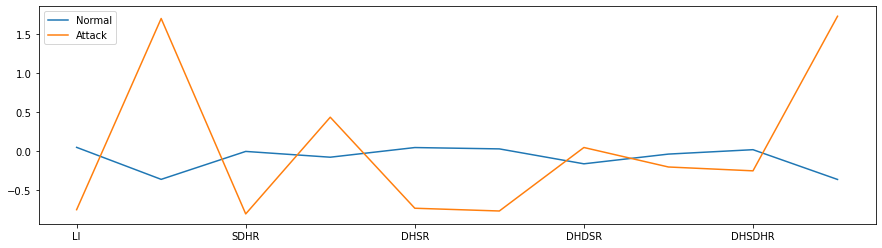

In [23]:
new_df.plot(figsize=(15,4),x_compat = True)

In [24]:
X = tcp[features]
y = tcp[target]

# HeatMap to demonstrate Relationship

[]

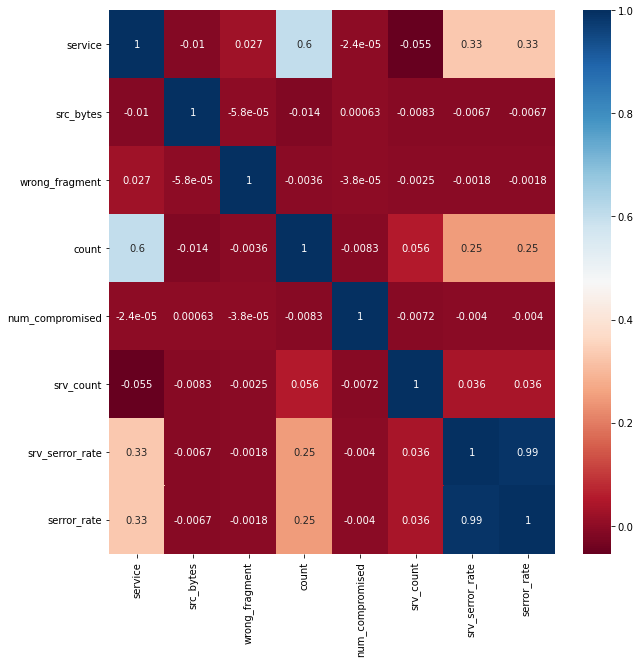

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(tcp[features].corr(), annot=True,cmap="RdBu")
plt.plot()

# Evaluating Important Features 

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rs = RandomForestClassifier()
rs.fit(X,y)
print(pd.Series(rs.feature_importances_,index=features).sort_values(ascending=False))

service            0.346275
src_bytes          0.300592
count              0.260592
srv_count          0.041535
serror_rate        0.019450
srv_serror_rate    0.019228
num_compromised    0.012313
wrong_fragment     0.000014
dtype: float64


In [28]:
#updated feature selection to release overfitting and accuracy improvement
#in generalised prediction
X = X[["service","count","srv_count","src_bytes","serror_rate"]]

# Machine Learning Model

In [29]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.3)

In [31]:
models = [('Logistic Regression',LogisticRegression(solver='liblinear')), 
          ('KNN Classifier',KNeighborsClassifier(n_neighbors=3)),
          ('MLP Classifer',MLPClassifier(alpha=0.005)),
          ('Decision Tree Classifier',DecisionTreeClassifier(random_state=3)),
          ('Random Forest Classfier',RandomForestClassifier(random_state=3))
         ]

scores=list()

In [32]:
for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    
    print('\n',name)
    print('---------------------------------')
    print("Accuracy of the model is: ", score)
    
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("*=============================================================*")


 Logistic Regression
---------------------------------
Accuracy of the model is:  88.39924039320822
Confusion Matrix:
 [[13151    36]
 [ 4118 18503]]
Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     13187
           1       1.00      0.82      0.90     22621

    accuracy                           0.88     35808
   macro avg       0.88      0.91      0.88     35808
weighted avg       0.91      0.88      0.89     35808

*=============================================================*

 KNN Classifier
---------------------------------
Accuracy of the model is:  99.68163538873995
Confusion Matrix:
 [[13142    45]
 [   69 22552]]
Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13187
           1       1.00      1.00      1.00     22621

    accuracy                           1.00     35808
   macro avg       1.00      1.00      1.00     35808
weighted avg       1.0

# Final Results

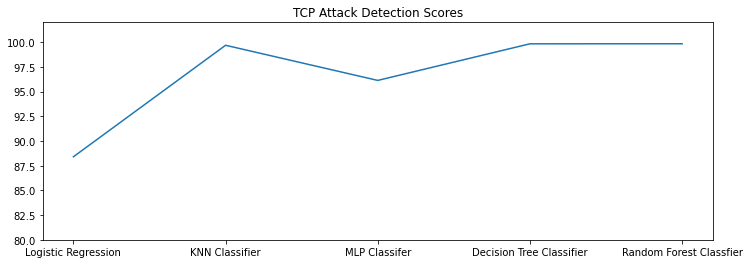

In [33]:
classifiers = [name for name,_ in models]
plt.figure(figsize=(12,4))
plt.plot(classifiers,scores)
plt.title("TCP Attack Detection Scores")
plt.ylim(80,102)
plt.show()

In [39]:
res = pd.read_csv('./datasets/Final_Result.csv',index_col=0)
res

,ICMP
Logistic Regression,99.915136
KNN Classifier,99.987877
MLP Classifer,99.886848
Decision Tree Classifier,99.987877
Random Forest Classfier,99.981815


In [40]:
res['TCP'] = scores
res

,ICMP,TCP
Logistic Regression,99.915136,88.399240
KNN Classifier,99.987877,99.681635
MLP Classifer,99.886848,96.126564
Decision Tree Classifier,99.987877,99.829647
Random Forest Classfier,99.981815,99.835232


In [41]:
res.to_csv('./datasets/Final_Result.csv')